# 5 - Regressão Linear com Regularização

### Carrega a base ex5data1.mat

In [8]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('am-T1-dados/ex5data1.mat')

X = mat["X"]
y = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]
Xtest = mat["Xtest"]
ytest = mat["ytest"]

m = X.shape[0]

### Aqui utilizamos o dataset para uma tarefa de regressão linear para prever a quantidade de agua fluindo  em  uma barragem usando a mudança de nivel de agua em um reservatorio

## - Visualização dos Dados

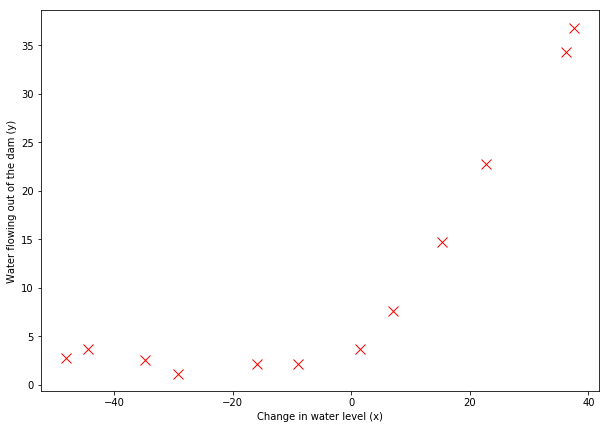

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show(block=False)

###  -  Função de custo da regressão linear regularizada

### Aqui utilizamos a funcado de custo acrescida de regularizacao L2 . Regularizacao de L2 tambem é chamada de Ridge Regression adicionando  magnitude grau 2 de penalidade de coeficiente para a funcao de perda

![teste](img/custo_lin_reg.png)

In [16]:
import numpy as np

def linearRegCostFunction(X, y, theta, lambda_val, return_grad=False):
    m = len(y) 
    theta = np.reshape(theta, (-1,y.shape[1]))
    J = 0
    grad = np.zeros(theta.shape)
    J = ( 1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m )*theta
    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
    grad[0] = grad_no_regularization[0]

    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 


In [62]:
theta = np.array([[1] , [1]])
X_padded = np.column_stack((np.ones((m,1)), X))
J = linearRegCostFunction(X_padded, y, theta, 1)
J

303.9931922202643

### Aqui obtermos a nossa funcao de custo regularizada

### Gradiente na regressão linear regularizada

In [64]:

theta = np.array([[1] , [1]])
J, grad = linearRegCostFunction(X_padded, y, theta, 1, True)
print(grad[0])
print(grad[1])

-15.303015674201186
598.2507441727035


### Ajustando os parâmetros da regressão linear

### Aqui plotamos o grafico sem regularizacao e com Lambda 0. O lambda é o hiperparametro utilizado na nossa regularizacao. Sendo que aumentar o valor lambda fortalece o efeito de regularização. Se seu valor lambda for muito alto, seu modelo será simples, mas você corre o risco de seu modelo sofrer de underfit


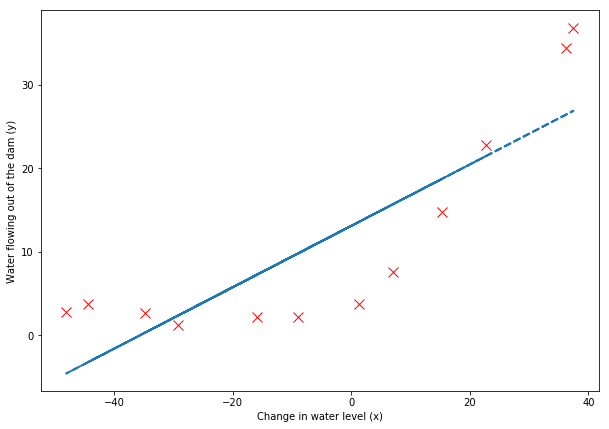

In [61]:

from scipy.optimize import minimize

initial_theta = np.zeros((X_padded.shape[1], 1))

lambda_val = 0

def costFunc(theta):
    return linearRegCostFunction(X_padded, y, theta, lambda_val, True)

maxiter = 200
results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

theta = results["x"]

plt.figure(figsize=(10, 7))
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(np.column_stack((np.ones((m,1)), X)), theta), '--', linewidth=2)
